In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.resnet50 import preprocess_input

In [ ]:
resnet_50 = tf.keras.applications.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

94765736/94765736 [==============================] - 1s 0us/step


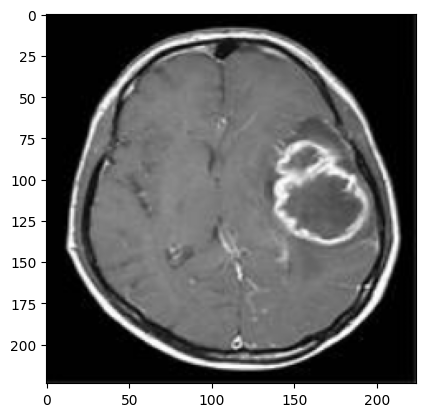

In [ ]:
import glob
for i, addres in enumerate(glob.glob('/content/th.jpg')):
  img = cv2.imread(addres)
  img = cv2.resize(img, (224, 224))
  ax = plt.imshow(img)

In [ ]:
def preprocess(img):
  # use the pre processing function of ResNet50
  img = preprocess_input(img)

  #expand the dimension
  return np.expand_dims(img, 0)

In [ ]:
input_image = preprocess(img)

In [ ]:
def get_activations_at(input_image, i):
  #index the layer
  out_layer = resnet_50.layers[i]

  #change the output of the model
  model = tf.keras.models.Model(inputs = resnet_50.inputs, outputs = out_layer.output)

  #return the activations
  return model.predict(input_image)

In [ ]:
def postprocess_activations(activations):

  #using the approach in https://arxiv.org/abs/1612.03928
  output = np.abs(activations)
  output = np.sum(output, axis = -1).squeeze()

  #resize and convert to image
  output = cv2.resize(output, (224, 224))
  output /= output.max()
  output *= 255
  return 255 - output.astype('uint8')

In [ ]:
def apply_heatmap(weights, img):
  #generate heat maps
  heatmap = cv2.applyColorMap(weights, cv2.COLORMAP_JET)
  heatmap = cv2.addWeighted(heatmap, 0.7, img, 0.3, 0)
  return heatmap

In [ ]:
def plot_heatmaps(rng):
  level_maps = None

  #given a range of indices generate the heat maps
  for i in rng:
    activations = get_activations_at(input_image, i)
    weights = postprocess_activations(activations)
    heatmap = apply_heatmap(weights, img)
    if level_maps is None:
      level_maps = heatmap
    else:
      level_maps = np.concatenate([level_maps, heatmap], axis = 1)
  plt.figure(figsize=(15, 15))
  plt.axis('off')
  ax = plt.imshow(level_maps)

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 90ms/step


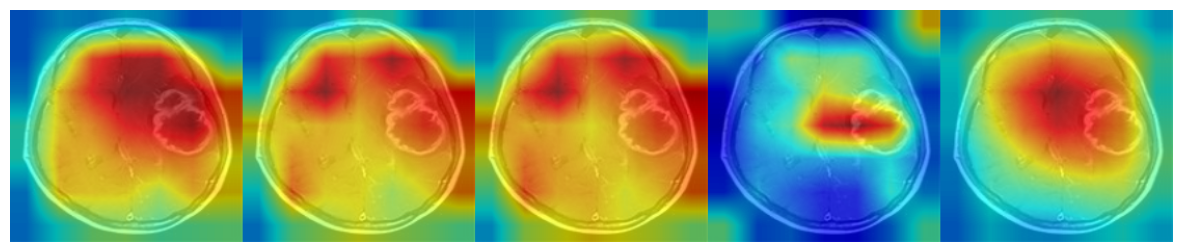

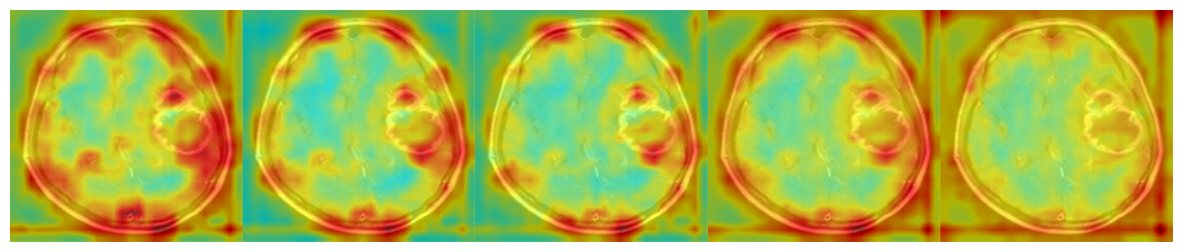

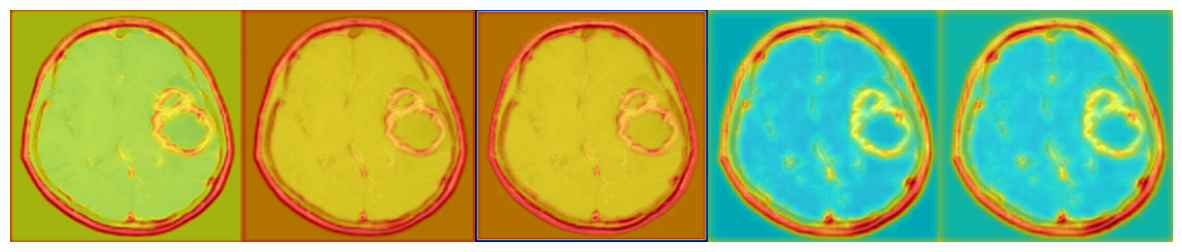

In [ ]:
plot_heatmaps(range(164, 169))
plot_heatmaps(range(76, 81))
plot_heatmaps(range(3, 8))